<a href="https://colab.research.google.com/github/Taikatou/economy-monte-carlo/blob/main/craftsman_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from gym import spaces, Env


In [2]:
pip install stable-baselines3[extra]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.8 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=e8e63e1eadca606f4b8ab3f3cdd248754fadcaebbb1a393ab246351245fe2f2f
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [3]:
from enum import IntEnum

class ResourceType(IntEnum):
    WOOD = 1
    METAL = 2
    GEM = 3
    DRAGONSCALE = 4

class SwordType(IntEnum):
    BEGINNER = 1
    INTERMEDIATE = 2
    ADVANCED = 3
    EPIC = 4
    ULTIMATE = 5

In [4]:
class MarketPricing:
    def __init__(self, price_increase_factor=0.1, min_price=0.5):
        self.resource_prices = {}
        self.sword_prices = {}
        self.price_increase_factor = price_increase_factor
        self.min_price = min_price
        self.reset()

    def update_resource_price(self, resource_type):
        if resource_type in self.resource_prices:
            # Increase price by a factor, ensuring it doesn't fall below the minimum price
            self.resource_prices[resource_type] = min(
                self.min_price,
                self.resource_prices[resource_type] * (1 - self.price_increase_factor)
            )

    def reset(self):
        # Reset prices to initial values or any logic you define for resetting the market
        self.resource_prices = {
            ResourceType.WOOD: 1.0,
            ResourceType.METAL: 1.0,
            ResourceType.GEM: 1.0,
            ResourceType.DRAGONSCALE: 1.0
        }
        self.sword_prices = {
            SwordType.BEGINNER: 10.0,
            SwordType.INTERMEDIATE: 12.0,
            SwordType.ADVANCED: 14.0,
            SwordType.EPIC: 16.0,
            SwordType.ULTIMATE: 18.0,
        }

    def update_sword_price(self, sword_type):
        # Increase sword price based on demand
        if sword_type in self.sword_prices:
            # Increase price by a factor, ensuring it doesn't fall below the minimum price
            self.sword_prices[sword_type] = min(
                self.max_price,
                self.sword_prices[sword_type] * (1 + self.price_increase_factor)
            )

    def simulate_market_crash(self, crash_factor):
        # Decrease prices dramatically to simulate a market crash
        for resource_type in self.resource_prices:
            self.resource_prices[resource_type] *= crash_factor

        for sword_type in self.sword_prices:
            self.sword_prices[sword_type] *= crash_factor

    def get_resource_prices(self):
        return self.resource_prices

    def get_sword_prices(self):
        return self.sword_prices

    def update_prices(self):
        # Decrease prices for resources
        for resource_type, price in self.resource_prices.items():
            decrease_amount = np.random.uniform(-self.price_decrease_factor, self.price_decrease_factor)
            self.resource_prices[resource_type] = max(self.min_price, min(self.max_price, price + decrease_amount))
        output = str(self.sword_prices)
        # Decrease prices for swords
        for sword_type, price in self.sword_prices.items():
            decrease_amount = np.random.uniform(-self.price_decrease_factor, self.price_decrease_factor)
            self.sword_prices[sword_type] = max(self.min_price, min(self.max_price, price + decrease_amount))
        # print(output + "\t" + str(self.sword_prices))
        # Record the prices after update
        self.price_history['resource_prices'].append(self.resource_prices.copy())
        self.price_history['sword_prices'].append(self.sword_prices.copy())

In [5]:
class MarketplaceEnv:
    def __init__(self, price_increase_factor=0.01, price_decrease_factor=0.05, min_price=0.5, max_price=100):
        self.price_increase_factor = price_increase_factor
        self.price_decrease_factor = price_decrease_factor
        self.min_price = min_price
        self.max_price = max_price
        self.resource_prices = {}
        self.sword_prices = {}
        self.reset()
        self.price_history = {
            'resource_prices': [],
            'sword_prices': []
        }

    def reset(self):
        # Reset prices to initial values or any logic you define for resetting the market
        self.resource_prices = {
            ResourceType.WOOD: 1.0,
            ResourceType.METAL: 1.0,
            ResourceType.GEM: 1.0,
            ResourceType.DRAGONSCALE: 1.0
        }
        self.sword_prices = {
            SwordType.BEGINNER: 10.0,
            SwordType.INTERMEDIATE: 12.0,
            SwordType.ADVANCED: 14.0,
            SwordType.EPIC: 16.0,
            SwordType.ULTIMATE: 18.0,
        }

    def get_sword_price(self, sword_type):
        return self.sword_prices[sword_type]

    def get_resource_prices(self):
        return self.resource_prices

    def update_prices(self):
        # Decrease prices for resources
        for resource_type, price in self.resource_prices.items():
            decrease_amount = np.random.uniform(-self.price_decrease_factor, self.price_decrease_factor)
            self.resource_prices[resource_type] = max(self.min_price, price + decrease_amount)
        output = str(self.sword_prices)
        # Decrease prices for swords
        for sword_type, price in self.sword_prices.items():
            decrease_amount = np.random.uniform(-self.price_decrease_factor, self.price_decrease_factor)
            self.sword_prices[sword_type] = max(self.min_price, price + decrease_amount)
        # print(output + "\t" + str(self.sword_prices))
        # Record the prices after update
        self.price_history['resource_prices'].append(self.resource_prices.copy())
        self.price_history['sword_prices'].append(self.sword_prices.copy())

    def update_resource_price(self, resource_type):
        if resource_type in self.resource_prices:
            # Increase price by a factor, ensuring it doesn't fall below the minimum price
            self.resource_prices[resource_type] = min(
                self.min_price,
                self.resource_prices[resource_type] * (1 - self.price_increase_factor)
            )

    def simulate_market_crash(self, crash_factor=0.5):
        # Assume crash_factor is the percentage by which the market crashes, e.g., prices are halved
        for resource_type in self.resource_prices:
            self.resource_prices[resource_type] *= crash_factor

        for sword_type in self.sword_prices:
            self.sword_prices[sword_type] *= crash_factor

    def update_sword_price(self, sword_type):
        if sword_type in self.sword_prices:
            # Increase price by a factor, ensuring it doesn't fall below the minimum price
            self.sword_prices[sword_type] = min(
                self.max_price,
                self.sword_prices[sword_type] * (1 + self.price_increase_factor)
            )

    def give_resource(self, resource_type, inventory):
        if resource_type in self.resource_prices:
            cost = self.resource_prices[resource_type]
            inventory.add_item(resource_type, 1)
            return cost
        return 0

# Initialize the shared marketplace environment
marketplace_env = MarketplaceEnv()

In [6]:
print(marketplace_env.price_history)

{'resource_prices': [], 'sword_prices': []}


In [7]:
class Inventory:
    def __init__(self, crafting_requirements):
        self.resources = {}
        self.swords = {}
        self.sale_account = {}
        self.crafting_requirements = crafting_requirements
        self.reset()

    def set_crafting_requirements(self, new_requirements):
        self.crafting_requirements = new_requirements

    def add_item(self, item, quantity=1):
        if item in self.resources:
            self.resources[item] += quantity
        else:
            self.resources[item] = quantity

    def reset(self):
        self.resources = {ResourceType.WOOD: 0,
                          ResourceType.METAL: 0,
                          ResourceType.GEM: 0,
                          ResourceType.DRAGONSCALE: 0}
        self.swords = {SwordType.BEGINNER: 0,
                        SwordType.INTERMEDIATE: 0,
                        SwordType.ADVANCED: 0,
                        SwordType.EPIC: 0,
                        SwordType.ULTIMATE: 0}

    def craft(self, item):
        if item in self.crafting_requirements:
            # Check if there are enough resources to craft the item
            for resource, amount_required in self.crafting_requirements[item].items():
                if self.resources[resource] < amount_required:
                    return False  # Not enough resources to craft the item

            # Deduct resources used for crafting
            for resource, amount_required in self.crafting_requirements[item].items():
                self.resources[resource] -= amount_required

            # Add the crafted item to the inventory
            self.swords[item] += 1
            return True
        else:
            return False  # Item cannot be crafted (not in crafting requirements)

In [8]:
class CraftingSellingEnv(Env):
    def __init__(self, marketplace_env, crafting_requirements):
        super(CraftingSellingEnv, self).__init__()
        self.marketplace_env = marketplace_env
        self.action_space = spaces.MultiDiscrete([5, 6])  # Resource collection and crafting/selling actions

        self.resources = np.zeros(4, dtype=np.int32)
        self.money = 100.0  # Starting money
        self.inventory = Inventory(crafting_requirements)
        # Define the observation space (flattened)
        num_resources = 4  # Number of resources
        num_swords = 5  # Number of sword types
        num_resource_prices = 4  # Number of market prices for resources
        num_swords_prices = 5  # Number of market prices for resources
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(num_resources + num_resource_prices + num_swords_prices + 1,), dtype=np.float32)

    def cooperative_crafting(self, partner_env, item_to_craft):
        # Check if both agents have the required resources for a joint craft
        own_requirements_met = all(self.inventory.items[res] >= req for res, req in self.inventory.crafting_requirements[item_to_craft].items())
        partner_requirements_met = all(partner_env.inventory.items[res] >= req for res, req in partner_env.inventory.crafting_requirements[item_to_craft].items())

        if own_requirements_met and partner_requirements_met:
            # Craft the item and share the rewards
            self.inventory.craft(item_to_craft)
            partner_env.inventory.craft(item_to_craft)
            shared_reward = self.marketplace_env.get_sword_price(SwordType[item_to_craft]) / 2
            return shared_reward
        return 0

    def step(self, action):
        self.marketplace_env.update_prices()
        resource_action, sell_action = action
        resources_chosen = [False] * 4
        reward = -0.005

        if resource_action > 0:
            resource_type = ResourceType(resource_action)
            cost = self.marketplace_env.give_resource(resource_type, self.inventory)
            self.marketplace_env.update_resource_price(resource_type)
            self.money -= cost  # Deduct the cost of the resource from the agent's money
            reward -= cost  # Decrement reward by the cost of the resource

        # Placeholder for reward and done logic

        done = False
        if sell_action > 0:
            sword = SwordType(sell_action)
            self.inventory.craft(sword)
            if self.inventory.swords[sword] > 0:
                income = self.sell_sword(sword)
                self.marketplace_env.update_sword_price(sword)
                reward += income

                # Check if the sold sword is an ULTIMATE_SWORD
                if sell_action == SwordType.ULTIMATE:
                    done = True  # Set done to True if an Ultimate Sword is sold

        return self._get_obs(), reward, done, {}

    def sell_sword(self, sword_type):
        self.inventory.swords[sword_type] -= 1  # Remove one sword from inventory
        selling_price = self.marketplace_env.get_sword_price(sword_type)
        self.money += selling_price  # Add money to the wallet based on current price
        return selling_price  # Return the income from selling the sword


    def reset(self):
        self.resources = np.zeros(4, dtype=np.int32)
        self.money = 100.0
        self.inventory.reset()
        self.marketplace_env.reset()
        return self._get_obs()

    def _get_obs(self):
        # Flatten all observations into a single array
        resource_obs = np.array(list(self.inventory.resources.values()))  # First 4 are resources
        resource_prices_obs = np.array(list(self.marketplace_env.get_resource_prices().values()))
        sword_prices_obs = np.array(list(self.marketplace_env.sword_prices.values()))
        money_obs = np.array([self.money])
        observations = np.concatenate((resource_obs, resource_prices_obs, sword_prices_obs, money_obs), axis=0)
        return observations

    def calculate_efficiency_metrics(self):
        # Assume we have logs of decisions and rewards
        average_decision_time = np.mean(self.decision_times)
        items_crafted = sum(self.inventory.items[sword] for sword in ['BeginnerSword', 'IntermediateSword', 'AdvancedSword'])
        liquidity = np.mean([self.marketplace_env.resource_prices[res] for res in ResourceType])

        efficiency_metrics = {
            'average_decision_time': average_decision_time,
            'items_crafted': items_crafted,
            'liquidity': liquidity,
            'total_reward': self.total_reward
        }
        return efficiency_metrics

    def render(self, mode='human', close=False):
        # Optional: Implement rendering logic
        pass

In [9]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

In [10]:
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
class RewardLoggerCallback(BaseCallback):
    def __init__(self, check_freq):
        super(RewardLoggerCallback, self).__init__()
        self.check_freq = check_freq
        self.rewards = []

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            episode_rewards = self.model.ep_info_buffer
            if episode_rewards:
                self.rewards.append(episode_rewards[-1]['r'])
                print(episode_rewards[-1]['r'])
        return True



/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


72.949243
57.051772
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | 115      |
| time/              |          |
|    fps             | 1781     |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 16384    |
---------------------------------
55.714817
109.011268
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 78          |
|    ep_rew_mean          | 120         |
| time/                   |             |
|    fps                  | 966         |
|    iterations           | 2           |
|    time_elapsed         | 33          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.020828772 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.38       |
|    explained_variance   | -0.

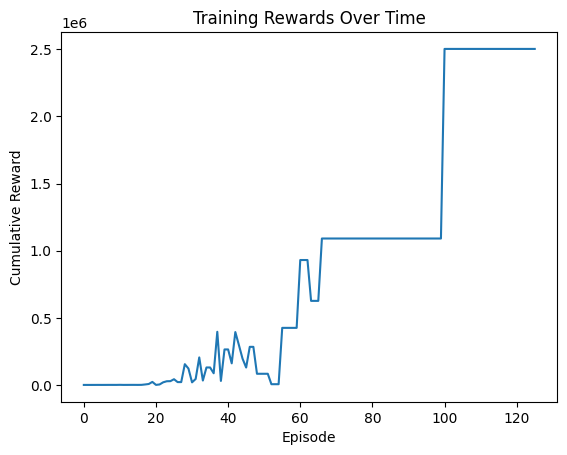

In [12]:
crafting_requirements = {
    SwordType.BEGINNER: {ResourceType.WOOD: 1, ResourceType.METAL: 1},
    SwordType.INTERMEDIATE: {ResourceType.WOOD: 2, ResourceType.METAL: 2},
    SwordType.ADVANCED: {ResourceType.GEM: 1, ResourceType.WOOD: 2, ResourceType.METAL: 2},
    SwordType.EPIC: {ResourceType.GEM: 2, ResourceType.WOOD: 2, ResourceType.METAL: 2},
    SwordType.ULTIMATE: {ResourceType.GEM: 2, ResourceType.WOOD: 2, ResourceType.METAL: 2, ResourceType.DRAGONSCALE: 1}
}

reward_logger = RewardLoggerCallback(check_freq=1000)
# Instantiate the agent
env = make_vec_env(lambda: CraftingSellingEnv(marketplace_env, crafting_requirements), n_envs=8)

model = PPO('MlpPolicy', env, verbose=1, clip_range=0.2)

# Train the agent
model.learn(total_timesteps=int(1e6), callback=reward_logger)

# Save the model
model.save("sac_deepq_bandit")
# Plot the rewards
plt.plot(reward_logger.rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Training Rewards Over Time')
plt.show()

# Save the agent
model.save("ppo_craftingselling")

In [13]:
# Load the trained agent (if needed)
# model = PPO.load("ppo_craftingselling", env=env)

# Test the trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
prices_before_crash = []
prices_after_crash = []

def run_simulation(env, num_episodes, crash_at_episode):
    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        while not done:
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            # Record the prices at each step
            prices_before_crash.append(env.marketplace_env.get_resource_prices())

            if episode == crash_at_episode:
                env.marketplace_env.simulate_market_crash()

        # Record prices after the crash for the remaining episodes
        if episode >= crash_at_episode:
            prices_after_crash.extend(prices_before_crash[-1:])  # Take the last recorded price in the episode

In [ ]:
import matplotlib.pyplot as plt

# Convert recorded prices to a DataFrame for easier plotting if not already in DataFrame format
import pandas as pd
price_data = pd.DataFrame(prices_before_crash + prices_after_crash, columns=['Wood', 'Metal', 'Gem', 'DragonScale'])

# Plotting
plt.figure(figsize=(12, 6))
for resource in price_data.columns:
    plt.plot(price_data[resource], label=resource)

plt.title('Market Prices Over Time')
plt.xlabel('Timestep')
plt.ylabel('Price')
plt.legend()
plt.axvline(x=crash_at_episode * steps_per_episode, color='red', linestyle='--', label='Market Crash')
plt.legend()
plt.show()